# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [1]:
import random


In [244]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __str__(self):
        return f"{self.rank} of {self.suit}"


In [259]:
class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = []
        self.plastic_position = 0
        self.populate()

    def populate(self):
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
        for _ in range(self.num_decks):
            for suit in suits:
                for rank in ranks:
                    self.cards.append(Card(suit, rank))
        self.shuffle()

    def shuffle(self):
        random.shuffle(self.cards)
        # Place the plastic card randomly in the deck
        self.plastic_position = random.randint(15, 35)  # Assuming a deck size of 52 cards

    def draw(self):
        if not self.cards:
            self.populate()
        if len(self.cards) - self.plastic_position <= 0:
            self.populate()  # Reshuffle the deck if no cards remaining
        return self.cards.pop(0)

In [229]:
# Testing

In [246]:
#Original Deck

deck = Deck(num_decks=1)
print("Original deck:")
for card in deck.cards:
    print(card)

Original deck:
2 of Diamonds
King of Diamonds
2 of Hearts
10 of Hearts
Queen of Spades
7 of Clubs
10 of Diamonds
Jack of Clubs
Jack of Diamonds
10 of Clubs
4 of Clubs
Ace of Spades
King of Clubs
Ace of Diamonds
8 of Hearts
4 of Spades
6 of Clubs
9 of Hearts
Queen of Diamonds
Ace of Clubs
2 of Spades
Queen of Clubs
7 of Spades
6 of Spades
Queen of Hearts
4 of Diamonds
6 of Hearts
9 of Diamonds
5 of Diamonds
7 of Diamonds
4 of Hearts
7 of Hearts
8 of Diamonds
9 of Clubs
5 of Hearts
Jack of Spades
3 of Hearts
3 of Spades
8 of Clubs
2 of Clubs
8 of Spades
10 of Spades
Jack of Hearts
5 of Spades
3 of Diamonds
Ace of Hearts
King of Hearts
King of Spades
5 of Clubs
3 of Clubs
6 of Diamonds
9 of Spades


In [247]:
deck.shuffle()
print("\nShuffled deck:")
for card in deck.cards:

    print(card)


Shuffled deck:
5 of Clubs
3 of Spades
Jack of Diamonds
10 of Spades
King of Diamonds
4 of Spades
7 of Spades
5 of Hearts
9 of Spades
Jack of Spades
Jack of Hearts
King of Hearts
Queen of Diamonds
2 of Diamonds
Ace of Spades
8 of Clubs
9 of Hearts
8 of Diamonds
8 of Hearts
3 of Diamonds
6 of Hearts
3 of Hearts
4 of Hearts
6 of Diamonds
9 of Clubs
Ace of Diamonds
2 of Clubs
Jack of Clubs
King of Clubs
9 of Diamonds
10 of Clubs
5 of Diamonds
7 of Diamonds
6 of Spades
Queen of Hearts
7 of Hearts
4 of Clubs
Ace of Clubs
5 of Spades
Queen of Clubs
7 of Clubs
10 of Hearts
Ace of Hearts
10 of Diamonds
King of Spades
8 of Spades
2 of Hearts
4 of Diamonds
6 of Clubs
3 of Clubs
Queen of Spades
2 of Spades


In [248]:
print("\nDrawing a card from the deck:")
print(deck.draw())


Drawing a card from the deck:
5 of Clubs


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

In [172]:
# Will upload UML diagram along with solution

#class Player: Represents a human player in the game 

#class Dealer: Represents the dealer player in the game

#class Hand: collection of cards held by a player (including both the dealer and human player)

#class Blackjack: Represents the blackjack game itself

# Classes defined in coming sections


3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [173]:
class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        pass

    def __str__(self):
        pass

In [174]:
class Player:
    def __init__(self, name, chips=100, strategy=None):
        self.name = name
        self.chips = chips
        self.hand = Hand()
        self.strategy = strategy

    def place_bet(self, amount):
        pass
    def receive_winnings(self, amount):
        pass

    def __str__(self):
        pass


In [175]:
class Dealer:
    def __init__(self):
        self.hand = Hand()

    def __str__(self):
        pass

In [176]:
class BlackjackGame:
    def __init__(self, players, num_decks=6):
        self.players = players
        self.dealer = Dealer()
        self.deck = Deck(num_decks)
        self.num_decks = num_decks

    def deal_initial_cards(self):
        pass

    def play_round(self):
        pass
        
    def calculate_hand_value(self, hand):
        pass
        
    def determine_winner(self):
        pass
        
    def play_game(self, num_rounds):
        pass

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [177]:
class Player:
    def __init__(self, name, chips=100, strategy=None):
        self.name = name
        self.chips = chips
        self.hand = Hand()
        self.strategy = strategy

    def place_bet(self, amount):
        if amount > self.chips:
            print("Insufficient chips to place the bet.")
            return False
        self.chips -= amount
        return True

    def receive_winnings(self, amount):
        self.chips += amount

    def __str__(self):
        return f"{self.name} has {self.chips} chips"


In [178]:
class Dealer:
    def __init__(self):
        self.hand = Hand()

    def __str__(self):
        return f"Dealer's hand: {self.hand}"

In [283]:
class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        self.cards.append(card)

    def __str__(self):
        hand_str = ", ".join(str(card) for card in self.cards)
        return f"Hand: {hand_str}"

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [180]:
class BlackjackGame:
    def __init__(self, players, num_decks=6):
        self.players = players
        self.dealer = Dealer()
        self.deck = Deck(num_decks)
        self.num_decks = num_decks

    def deal_initial_cards(self):
        for _ in range(2):
            for player in self.players:
                player.hand.add_card(self.deck.draw())
            self.dealer.hand.add_card(self.deck.draw())

    def play_round(self):
        self.deal_initial_cards()
        for player in self.players:
            while True:
                print(f"{player.name}'s hand: {player.hand}")
                action = input("Do you want to hit or stand? (hit/stand): ").lower()
                if action == 'hit':
                    player.hand.add_card(self.deck.draw())
                    if self.calculate_hand_value(player.hand) > 21:
                        print("Busted!")
                        break
                elif action == 'stand':
                    break
                else:
                    print("Invalid input! Please enter 'hit' or 'stand'.")
        # Dealer's turn
        while self.calculate_hand_value(self.dealer.hand) < 17:
            self.dealer.hand.add_card(self.deck.draw())

    def calculate_hand_value(self, hand):
        total = 0
        num_aces = 0
        for card in hand.cards:
            if card.rank.isdigit():
                total += int(card.rank)
            elif card.rank in ['Jack', 'Queen', 'King']:
                total += 10
            elif card.rank == 'Ace':
                total += 11
                num_aces += 1
        while total > 21 and num_aces:
            total -= 10
            num_aces -= 1
        return total

    def determine_winner(self):
        dealer_value = self.calculate_hand_value(self.dealer.hand)
        for player in self.players:
            player_value = self.calculate_hand_value(player.hand)
            if player_value > 21:
                print(f"{player.name} busted!")
            elif dealer_value > 21 or player_value > dealer_value:
                print(f"{player.name} wins!")
                player.receive_winnings(2)
            elif player_value == dealer_value:
                print(f"{player.name} pushes!")
                player.receive_winnings(1)
            else:
                print(f"{player.name} loses!")

    def play_game(self, num_rounds):
        for i in range(1, num_rounds + 1):
            print("\nRound Number",i)
            self.play_round()
            print("\nDealer's hand:", self.dealer.hand)
            self.determine_winner()
            for player in self.players:
                print(player)
            self.clear_hands()

    def clear_hands(self):
        self.dealer.hand = Hand()
        for player in self.players:
            player.hand = Hand()



In [115]:
# Testing the game


if __name__ == "__main__":
    num_players = 2
    players = []
    for i in range(num_players):
        players.append(Player(f"Player {i+1}"))
    game = BlackjackGame(players)
    num_rounds = 5  # Number of rounds to play
    game.play_game(num_rounds)


Round Number 1
Player 1's hand: Hand: King of Diamonds, Queen of Spades


Do you want to hit or stand? (hit/stand):  hit


Busted!
Player 2's hand: Hand: Queen of Clubs, Queen of Diamonds


Do you want to hit or stand? (hit/stand):  hit


Busted!

Dealer's hand: Hand: 10 of Hearts, 10 of Clubs
Player 1 busted!
Player 2 busted!
Player 1 has 100 chips
Player 2 has 100 chips

Round Number 2
Player 1's hand: Hand: 4 of Diamonds, King of Spades


Do you want to hit or stand? (hit/stand):  stand


Player 2's hand: Hand: 7 of Spades, 8 of Diamonds


Do you want to hit or stand? (hit/stand):  hit


Busted!

Dealer's hand: Hand: King of Diamonds, Ace of Spades
Player 1 loses!
Player 2 busted!
Player 1 has 100 chips
Player 2 has 100 chips

Round Number 3
Player 1's hand: Hand: Queen of Clubs, Jack of Diamonds


Do you want to hit or stand? (hit/stand):  stand


Player 2's hand: Hand: Jack of Spades, 7 of Clubs


Do you want to hit or stand? (hit/stand):  stand



Dealer's hand: Hand: 5 of Hearts, 5 of Diamonds, Jack of Spades
Player 1 pushes!
Player 2 loses!
Player 1 has 101 chips
Player 2 has 100 chips

Round Number 4
Player 1's hand: Hand: Ace of Clubs, 8 of Clubs


Do you want to hit or stand? (hit/stand):  hit


Player 1's hand: Hand: Ace of Clubs, 8 of Clubs, 3 of Hearts


Do you want to hit or stand? (hit/stand):  stand


Player 2's hand: Hand: Jack of Diamonds, 4 of Diamonds


Do you want to hit or stand? (hit/stand):  hit


Busted!

Dealer's hand: Hand: 7 of Hearts, 6 of Hearts, 7 of Clubs
Player 1 loses!
Player 2 busted!
Player 1 has 101 chips
Player 2 has 100 chips

Round Number 5
Player 1's hand: Hand: 4 of Clubs, 7 of Diamonds


Do you want to hit or stand? (hit/stand):  hit


Player 1's hand: Hand: 4 of Clubs, 7 of Diamonds, King of Spades


Do you want to hit or stand? (hit/stand):  stand


Player 2's hand: Hand: 7 of Spades, 10 of Spades


Do you want to hit or stand? (hit/stand):  stand



Dealer's hand: Hand: 8 of Diamonds, Ace of Clubs
Player 1 wins!
Player 2 loses!
Player 1 has 103 chips
Player 2 has 100 chips


6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [181]:
class CardCounterPlayer(Player):
    def __init__(self, name, chips=100, strategy=None):
        super().__init__(name, chips, strategy)

    def card_value(self, card):
        if card.rank.isdigit():
            value = int(card.rank)
        elif card.rank in ['Jack', 'Queen', 'King']:
            value = 10
        else:  # Ace
            value = 11
        if 2 <= value <= 6:
            return 1
        elif 7 <= value <= 9:
            return 0
        else:  # 10, Jack, Queen, King, Ace
            return -1


In [239]:
class BlackjackGame:
    def __init__(self, players, num_decks=6):
        self.players = players
        self.dealer = Dealer()
        self.deck = Deck(num_decks)
        self.num_decks = num_decks

    def deal_initial_cards(self):
        for _ in range(2):
            for player in self.players:
                player.hand.add_card(self.deck.draw())
            self.dealer.hand.add_card(self.deck.draw())

    def play_round(self):
        self.deal_initial_cards()
        for player in self.players:
            while True:
                print(f"{player.name}'s hand: {player.hand}")
                if isinstance(player, CardCounterPlayer):
                    sum_values = sum(player.card_value(card) for card in player.hand.cards)
                    if sum_values <= -2:
                        action = 'hit'
                    else:
                        action = 'stand'
                else:
                    action = input("Do you want to hit or stand? (hit/stand): ").lower()
                if action == 'hit':
                    player.hand.add_card(self.deck.draw())
                    if self.calculate_hand_value(player.hand) > 21:
                        print("Busted!")
                        break
                elif action == 'stand':
                    break
                else:
                    print("Invalid input! Please enter 'hit' or 'stand'.")
        # Dealer's turn
        while self.calculate_hand_value(self.dealer.hand) < 17:
            self.dealer.hand.add_card(self.deck.draw())

    def calculate_hand_value(self, hand):
        total = 0
        num_aces = 0
        for card in hand.cards:
            if card.rank.isdigit():
                total += int(card.rank)
            elif card.rank in ['Jack', 'Queen', 'King']:
                total += 10
            else:  # Ace
                total += 11
                num_aces += 1
        while total > 21 and num_aces:
            total -= 10
            num_aces -= 1
        return total

    def determine_winner(self):
        dealer_value = self.calculate_hand_value(self.dealer.hand)
        for player in self.players:
            player_value = self.calculate_hand_value(player.hand)
            if player_value > 21:
                print(f"{player.name} busted!")
            elif dealer_value > 21 or player_value > dealer_value:
                print(f"{player.name} wins!")
                player.receive_winnings(2)
            elif player_value == dealer_value:
                print(f"{player.name} pushes!")
                player.receive_winnings(1)
            else:
                print(f"{player.name} loses!")

    def play_game(self, num_rounds):
        for i in range(1, num_rounds + 1):
            print("\nRound Number",i)
            self.play_round()
            print("\nDealer's hand:", self.dealer.hand)
            self.determine_winner()
            for player in self.players:
                print(player)
            self.clear_hands()

    def clear_hands(self):
        self.dealer.hand = Hand()
        for player in self.players:
            player.hand = Hand()


In [124]:
# regular players
player1 = Player("Abcd")
player2 = Player("Xyz")

# card counter player
player3 = CardCounterPlayer("Counter")


In [125]:
# Blackjack game with players
game = BlackjackGame([player1, player2, player3])

# game for 5 rounds
game.play_game(5)



Round Number 1
Abcd's hand: Hand: 10 of Diamonds, 9 of Clubs


Do you want to hit or stand? (hit/stand):  stand


Xyz's hand: Hand: 8 of Hearts, 10 of Spades


Do you want to hit or stand? (hit/stand):  hit


Busted!
Counter's hand: Hand: Jack of Hearts, 9 of Spades

Dealer's hand: Hand: Queen of Clubs, 7 of Clubs
Abcd wins!
Xyz busted!
Counter wins!
Abcd has 102 chips
Xyz has 100 chips
Counter has 102 chips

Round Number 2
Abcd's hand: Hand: 8 of Spades, Queen of Hearts


Do you want to hit or stand? (hit/stand):  stand


Xyz's hand: Hand: 10 of Hearts, King of Spades


Do you want to hit or stand? (hit/stand):  stand


Counter's hand: Hand: 6 of Diamonds, 8 of Clubs

Dealer's hand: Hand: 3 of Clubs, 8 of Spades, 7 of Diamonds
Abcd pushes!
Xyz wins!
Counter loses!
Abcd has 103 chips
Xyz has 102 chips
Counter has 102 chips

Round Number 3
Abcd's hand: Hand: 9 of Diamonds, 3 of Hearts


Do you want to hit or stand? (hit/stand):  hit


Abcd's hand: Hand: 9 of Diamonds, 3 of Hearts, 3 of Hearts


Do you want to hit or stand? (hit/stand):  hit


Abcd's hand: Hand: 9 of Diamonds, 3 of Hearts, 3 of Hearts, 4 of Hearts


Do you want to hit or stand? (hit/stand):  stand


Xyz's hand: Hand: Jack of Spades, King of Hearts


Do you want to hit or stand? (hit/stand):  stand


Counter's hand: Hand: 6 of Diamonds, King of Clubs

Dealer's hand: Hand: 4 of Hearts, King of Hearts, 5 of Clubs
Abcd pushes!
Xyz wins!
Counter loses!
Abcd has 104 chips
Xyz has 104 chips
Counter has 102 chips

Round Number 4
Abcd's hand: Hand: 4 of Clubs, Ace of Spades


Do you want to hit or stand? (hit/stand):  stand


Xyz's hand: Hand: 4 of Hearts, 3 of Diamonds


Do you want to hit or stand? (hit/stand):  hit


Xyz's hand: Hand: 4 of Hearts, 3 of Diamonds, 4 of Hearts


Do you want to hit or stand? (hit/stand):  hit


Xyz's hand: Hand: 4 of Hearts, 3 of Diamonds, 4 of Hearts, 9 of Clubs


Do you want to hit or stand? (hit/stand):  stand


Counter's hand: Hand: 2 of Spades, 7 of Clubs

Dealer's hand: Hand: Jack of Clubs, 9 of Hearts
Abcd loses!
Xyz wins!
Counter loses!
Abcd has 104 chips
Xyz has 106 chips
Counter has 102 chips

Round Number 5
Abcd's hand: Hand: Jack of Hearts, Ace of Hearts


Do you want to hit or stand? (hit/stand):  stand


Xyz's hand: Hand: Queen of Spades, 9 of Spades


Do you want to hit or stand? (hit/stand):  stand


Counter's hand: Hand: 5 of Spades, 3 of Spades

Dealer's hand: Hand: 9 of Spades, 5 of Diamonds, 9 of Diamonds
Abcd wins!
Xyz wins!
Counter wins!
Abcd has 106 chips
Xyz has 108 chips
Counter has 104 chips


7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [316]:
class Player:
    def __init__(self, name, starting_chips=100):
        self.player_name = name
        self.player_chips = starting_chips
        self.player_hand = Hand()
        self.initial_bet = min(starting_chips, 20)

    def place_bet(self):
        if self.initial_bet > self.player_chips:
            print("Insufficient chips to place the bet.")
            return False
        self.player_chips -= self.initial_bet
        return True

    def receive_winnings(self, amount):
        self.player_chips += amount

    def add_card_to_hand(self, card):
        self.player_hand.add_card(card)

    def reset_hand(self):
        self.player_hand = Hand()

    def calculate_hand_value(self):
        total_value = 0
        num_aces = 0

        for card in self.player_hand.cards:
            if card.rank.isdigit():
                total_value += int(card.rank)
            elif card.rank in ['Jack', 'Queen', 'King']:
                total_value += 10
            else:  # Ace
                total_value += 11
                num_aces += 1
        while total_value > 21 and num_aces:
            total_value -= 10
            num_aces -= 1
        return total_value

    def win_bet(self):
        self.player_chips += 2 * self.initial_bet

    def lose_bet(self):
        pass

    def __str__(self):
        return f"{self.player_name} has {self.player_chips} chips"

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer")
        
    def show_hand(self, reveal=False): 
        if not reveal:
            print(f"Dealer's hand: {self.player_hand.cards[0]}")
        else:
            print("Dealer's hand:")
            for card in self.player_hand.cards:
                print(card)


In [297]:


class CardCounterPlayer(Player):
    def __init__(self, name, chips=100, hit_threshold=-2):
        super().__init__(name, chips)
        self.card_count = 0
        self.hit_threshold = hit_threshold
        
    def add_card_to_hand(self, card):
        super().add_card_to_hand(card)
        self.update_card_count(card)
        
    def update_card_count(self, card): #update ;ater
        if card.rank.isdigit() and 2 <= int(card.rank) <= 6:
            self.card_count += 1
        elif card.rank in ["10", "Jack", "Queen", "King", "Ace"]:
            self.card_count -= 1
                
    def hit(self): 
        return self.card_count < self.hit_threshold
    
    def play(self, deck):
        while self.hit():
            card = deck.draw()
            if card:
                self.add_card_to_hand(card)
            else:
                break


In [315]:

class BlackjackGame:
    @staticmethod
    def play_round(deck, players, dealer, verbose=False):
        for _ in range(2):
            for player in players:
                player.add_card_to_hand(deck.draw())
            dealer.add_card_to_hand(deck.draw())
            
        if verbose:
            dealer.show_hand()
        
        for player in players:
            player.place_bet()
        
        if verbose:
           for player in players:
                print(f"{player.player_name}'s hand: {', '.join(map(str, player.player_hand))}, value: {player.calculate_hand_value()}")
        
        for player in players:
            while player.calculate_hand_value() < 17:
                card = deck.draw()
                if card:
                    player.add_card_to_hand(card)
                    if verbose:
                        print(f"{player.player_name} hits and received {card}.")
                else:
                    break
            if verbose:
                print(f"{player.player_name} finishes playing.")
            
        while dealer.calculate_hand_value() < 17:
            card = deck.draw()
            if card:
                dealer.add_card_to_hand(card)
                if verbose:
                    print(f"Dealer hits and received {card}.")
            else:
                break
            if verbose:
                dealer.show_hand(reveal=True)
        
        #winneer
        dealer_value = dealer.calculate_hand_value()
        for player in players:
            player_value = player.calculate_hand_value()
            if player.player_name == "StrategicPlayer":
                print(f"StrategicPlayer's current chips: {player.player_chips}")
                print(f"StrategicPlayer's bet: {player.initial_bet}")
            if player_value > 21:
                print(f"{player.player_name} has busted. Dealer wins!")
                player.lose_bet()
            elif dealer_value > 21:
                print(f"Dealer has busted. {player.player_name} wins!")
                player.win_bet()
            elif player_value > dealer_value:
                print(f"{player.player_name} wins!")
                player.win_bet()
            elif player_value < dealer_value:
                print(f"{player.player_name} has lost. Dealer wins!")
                player.lose_bet()
            else:
                print(f"{player.player_name} and Dealer tie.")
                
        for player in players:
            player.reset_hand()
        dealer.reset_hand()
        
    @staticmethod
    def test_scenario():
        player_chips = 100
        players = [Player(f"Player {i+1}", starting_chips=player_chips) for i in range(3)]
        dealer = Dealer()
        strat_player = CardCounterPlayer("StrategicPlayer", chips=player_chips, hit_threshold=-2)
        num_rounds = 50
        player_chips = 100
        deck = Deck()
        
        for round_num in range(1, num_rounds+1):
            print(f"\nRound {round_num}:\n")
            BlackjackGame.play_round(deck, [strat_player]+players, dealer)
            if strat_player.player_chips <= 0:
                break
                
        print(f"Strategy Player's Winnings: {strat_player.player_chips - player_chips}")


In [301]:
BlackjackGame.test_scenario()  



Round 1:

StrategicPlayer's current chips: 80
StrategicPlayer's bet: 20
StrategicPlayer has lost. Dealer wins!
Player 1 has lost. Dealer wins!
Player 2 has lost. Dealer wins!
Player 3 wins!

Round 2:

StrategicPlayer's current chips: 60
StrategicPlayer's bet: 20
StrategicPlayer has busted. Dealer wins!
Player 1 has busted. Dealer wins!
Dealer has busted. Player 2 wins!
Dealer has busted. Player 3 wins!

Round 3:

StrategicPlayer's current chips: 40
StrategicPlayer's bet: 20
StrategicPlayer has busted. Dealer wins!
Player 1 has lost. Dealer wins!
Player 2 has lost. Dealer wins!
Player 3 has busted. Dealer wins!

Round 4:

StrategicPlayer's current chips: 20
StrategicPlayer's bet: 20
StrategicPlayer wins!
Player 1 has busted. Dealer wins!
Player 2 has busted. Dealer wins!
Player 3 wins!

Round 5:

StrategicPlayer's current chips: 40
StrategicPlayer's bet: 20
StrategicPlayer has busted. Dealer wins!
Player 1 has busted. Dealer wins!
Player 2 has lost. Dealer wins!
Player 3 has lost. Deal

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


In [302]:
import numpy as np

In [304]:
winnings_list = []

for _ in range(100):
    player_chips = 100
    players = [Player(f"Player {i+1}", starting_chips=player_chips) for i in range(3)]
    dealer = Dealer()
    strat_player = CardCounterPlayer("StrategicPlayer", chips=player_chips, hit_threshold=-2)
    
    num_rounds = 50
    deck = Deck()
    
    for _ in range(num_rounds):
        BlackjackGame.play_round(deck, [strat_player]+players, dealer)
        if strat_player.player_chips <= 0:
            break

    winnings_list.append(strat_player.player_chips)


StrategicPlayer's current chips: 80
StrategicPlayer's bet: 20
Dealer has busted. StrategicPlayer wins!
Dealer has busted. Player 1 wins!
Dealer has busted. Player 2 wins!
Player 3 has busted. Dealer wins!
StrategicPlayer's current chips: 100
StrategicPlayer's bet: 20
StrategicPlayer has busted. Dealer wins!
Player 1 wins!
Player 2 wins!
Player 3 wins!
StrategicPlayer's current chips: 80
StrategicPlayer's bet: 20
StrategicPlayer has busted. Dealer wins!
Player 1 has busted. Dealer wins!
Player 2 wins!
Player 3 has busted. Dealer wins!
StrategicPlayer's current chips: 60
StrategicPlayer's bet: 20
StrategicPlayer has lost. Dealer wins!
Player 1 wins!
Player 2 wins!
Player 3 and Dealer tie.
StrategicPlayer's current chips: 40
StrategicPlayer's bet: 20
StrategicPlayer wins!
Player 1 wins!
Player 2 wins!
Player 3 wins!
StrategicPlayer's current chips: 60
StrategicPlayer's bet: 20
StrategicPlayer has lost. Dealer wins!
Player 1 has lost. Dealer wins!
Player 2 and Dealer tie.
Player 3 has lost

In [306]:
average_winnings_per_round = np.mean(winnings_list) / num_rounds
standard_deviation = np.std(winnings_list)
probability_net_win = sum(1 for chips in winnings_list if chips > 100) / len(winnings_list)
probability_net_loss = 1 - probability_net_win

print("Average winnings per round:", average_winnings_per_round)
print("Standard deviation:", standard_deviation)
print("Probability of net winning after 50 rounds:", probability_net_win)
print("Probability of net losing after 50 rounds:", probability_net_loss)

Average winnings per round: 0.268
Standard deviation: 44.815622276166145
Probability of net winning after 50 rounds: 0.05
Probability of net losing after 50 rounds: 0.95


In [309]:
import matplotlib.pyplot as plt

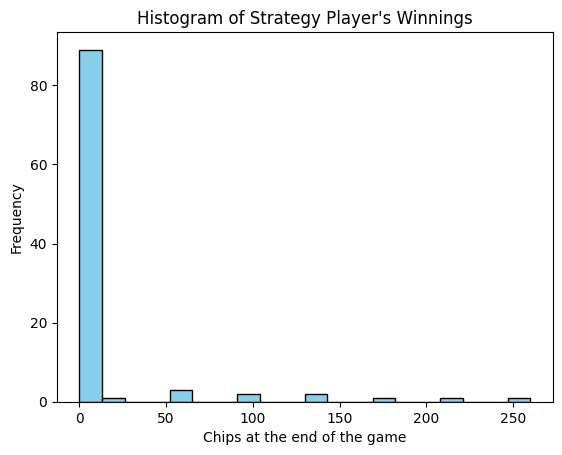

In [310]:
plt.hist(winnings_list, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Chips at the end of the game')
plt.ylabel('Frequency')
plt.title('Histogram of Strategy Player\'s Winnings')

plt.show()


9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [311]:
def run_simulation(threshold):
    winnings_list = []
    for _ in range(100):
        player_chips = 100
        players = [Player(f"Player {i+1}", starting_chips=player_chips) for i in range(3)]
        dealer = Dealer()
        strat_player = CardCounterPlayer("StrategicPlayer", chips=player_chips, hit_threshold=threshold)
        
        # --- game parameters
        num_rounds = 50
        deck = Deck()
        
        for _ in range(num_rounds):
            BlackjackGame.play_round(deck, [strat_player]+players, dealer)
            if strat_player.player_chips <= 0:
                break
        
        # .strategy player's chips at the end of the game
        winnings_list.append(strat_player.player_chips)
    
    #  statistics
    average_winnings_per_round = np.mean(winnings_list) / num_rounds
    standard_deviation = np.std(winnings_list)
    probability_net_win = sum(1 for chips in winnings_list if chips > 100) / len(winnings_list)
    probability_net_loss = 1 - probability_net_win
    
    return average_winnings_per_round, standard_deviation, probability_net_win, probability_net_loss



In [312]:
threshold_values = [-1, -2, -3, -4, -5]

average_winnings_list = []
std_deviation_list = []
net_win_probability_list = []
net_loss_probability_list = []

for threshold in threshold_values:
    average_winnings, std_deviation, net_win_probability, net_loss_probability = run_simulation(threshold)
    average_winnings_list.append(average_winnings)
    std_deviation_list.append(std_deviation)
    net_win_probability_list.append(net_win_probability)
    net_loss_probability_list.append(net_loss_probability)



StrategicPlayer's current chips: 80
StrategicPlayer's bet: 20
StrategicPlayer and Dealer tie.
Player 1 has lost. Dealer wins!
Player 2 has lost. Dealer wins!
Player 3 has lost. Dealer wins!
StrategicPlayer's current chips: 60
StrategicPlayer's bet: 20
StrategicPlayer and Dealer tie.
Player 1 has busted. Dealer wins!
Player 2 wins!
Player 3 wins!
StrategicPlayer's current chips: 40
StrategicPlayer's bet: 20
StrategicPlayer has busted. Dealer wins!
Player 1 wins!
Player 2 wins!
Player 3 has lost. Dealer wins!
StrategicPlayer's current chips: 20
StrategicPlayer's bet: 20
StrategicPlayer and Dealer tie.
Player 1 wins!
Player 2 wins!
Player 3 has busted. Dealer wins!
StrategicPlayer's current chips: 0
StrategicPlayer's bet: 20
StrategicPlayer wins!
Player 1 and Dealer tie.
Player 2 has lost. Dealer wins!
Player 3 has busted. Dealer wins!
StrategicPlayer's current chips: 20
StrategicPlayer's bet: 20
StrategicPlayer wins!
Player 1 has lost. Dealer wins!
Player 2 wins!
Player 3 has lost. Deale

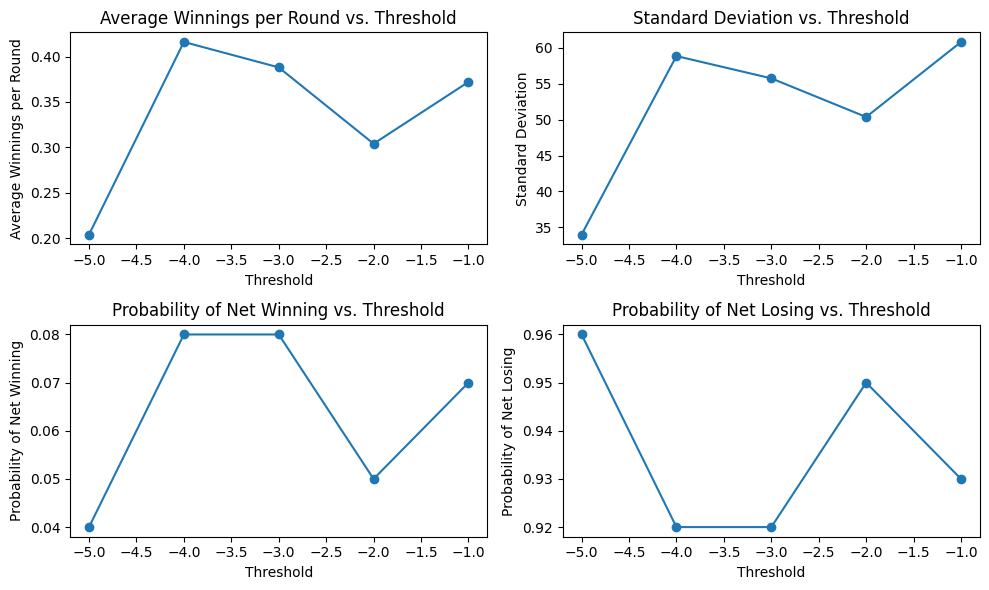

In [314]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(threshold_values, average_winnings_list, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Average Winnings per Round')
plt.title('Average Winnings per Round vs. Threshold')

plt.subplot(2, 2, 2)
plt.plot(threshold_values, std_deviation_list, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation vs. Threshold')

plt.subplot(2, 2, 3)
plt.plot(threshold_values, net_win_probability_list, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Probability of Net Winning')
plt.title('Probability of Net Winning vs. Threshold')

plt.subplot(2, 2, 4)
plt.plot(threshold_values, net_loss_probability_list, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Probability of Net Losing')
plt.title('Probability of Net Losing vs. Threshold')

plt.tight_layout()
plt.show()


10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

In [320]:
class AggressivePlayer(Player):
    def __init__(self, name, starting_chips=100, aggressive_threshold=18, conservative_bet=10, aggressive_bet=20):
        super().__init__(name, starting_chips)
        self.aggressive_threshold = aggressive_threshold
        self.conservative_bet = conservative_bet
        self.aggressive_bet = aggressive_bet

    #dynamically adjusts betting behavior based on the strength of the player's hand
    
    def place_bet(self):
        if self.calculate_hand_value() >= self.aggressive_threshold:
            bet_amount = min(self.aggressive_bet, self.player_chips)
        else:
            bet_amount = min(self.conservative_bet, self.player_chips)
        self.player_chips -= bet_amount
        return bet_amount


In [318]:
def simulate_games(num_games, num_rounds):
    player_chips_original = 100
    player_chips_aggressive = 100

    for _ in range(num_games):
        deck = Deck()
        players_original = [Player("Player", starting_chips=player_chips_original) for _ in range(3)]
        players_aggressive = [AggressivePlayer("AggressivePlayer", starting_chips=player_chips_aggressive) for _ in range(3)]
        dealer = Dealer()

        for _ in range(num_rounds):
            BlackjackGame.play_round(deck, players_original, dealer)
            BlackjackGame.play_round(deck, players_aggressive, dealer)

        player_chips_original += sum(player.player_chips - 100 for player in players_original)
        player_chips_aggressive += sum(player.player_chips - 100 for player in players_aggressive)

    print("Original Player Winnings:", player_chips_original)
    print("Aggressive Player Winnings:", player_chips_aggressive)



In [319]:
simulate_games(100, 50)


Player has lost. Dealer wins!
Player wins!
Player has busted. Dealer wins!
AggressivePlayer wins!
AggressivePlayer wins!
AggressivePlayer wins!
Player wins!
Player and Dealer tie.
Player has lost. Dealer wins!
AggressivePlayer has busted. Dealer wins!
AggressivePlayer has busted. Dealer wins!
AggressivePlayer has busted. Dealer wins!
Player has lost. Dealer wins!
Player wins!
Player wins!
AggressivePlayer has lost. Dealer wins!
AggressivePlayer has lost. Dealer wins!
AggressivePlayer has busted. Dealer wins!
Player and Dealer tie.
Player and Dealer tie.
Player wins!
AggressivePlayer wins!
AggressivePlayer and Dealer tie.
AggressivePlayer has lost. Dealer wins!
Player has busted. Dealer wins!
Player has busted. Dealer wins!
Player has busted. Dealer wins!
AggressivePlayer has lost. Dealer wins!
AggressivePlayer and Dealer tie.
AggressivePlayer and Dealer tie.
Player and Dealer tie.
Player has lost. Dealer wins!
Player has lost. Dealer wins!
Dealer has busted. AggressivePlayer wins!
Aggr